In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('music tours.csv')


print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Rank                              20 non-null     int64 
 1   Peak                              9 non-null      object
 2   All Time Peak                     6 non-null      object
 3   Actual gross                      20 non-null     object
 4   Adjusted gross (in 2022 dollars)  20 non-null     object
 5   Artist                            20 non-null     object
 6   Tour title                        20 non-null     object
 7   Year(s)                           20 non-null     object
 8   Shows                             20 non-null     int64 
 9   Average gross                     20 non-null     object
 10  Ref.                              20 non-null     object
dtypes: int64(2), object(9)
memory usage: 1.8+ KB
None
            Rank       Shows
count  

In [80]:

df_before = df.copy()

df.columns = df.columns.str.replace(r'\s+', ' ', regex=True).str.strip()
df.columns = df.columns.str.replace('\xa0', ' ', regex=True)  

num_cols = ['Actual gross', 'Adjusted gross (in 2022 dollars)', 'Average gross']


for col in num_cols:
    if col in df.columns:  
        df_before[f"{col}_before"] = df[col]  
        df[col] = df[col].astype(str).str.replace(r'\[.*?\]', '', regex=True) \
                                .str.replace(r'[\$,]', '', regex=True) \
                                .str.strip()
        df[col] = pd.to_numeric(df[col], errors='coerce')  


df = df.assign(
    Peak=df['Peak'].fillna('Unknown') if 'Peak' in df.columns else 'Unknown',
    All_Time_Peak=df['All Time Peak'].fillna('Unknown') if 'All Time Peak' in df.columns else 'Unknown'
)

if 'Year(s)' in df.columns:
    df['Start_Year'] = df['Year(s)'].astype(str).apply(lambda x: x.split('–')[0] if '–' in x else x)


df.drop(columns=['Ref.'], errors='ignore', inplace=True)

print("\nKolom dalam dataset setelah cleaning:", df.columns.tolist())

print("\n=== BEFORE CLEANING ===")
print(df_before[[f"{col}_before" for col in num_cols if f"{col}_before" in df_before.columns]].head())

print("\n=== AFTER CLEANING ===")
print(df[[col for col in num_cols if col in df.columns]].head())


Kolom dalam dataset setelah cleaning: ['Rank', 'Peak', 'All Time Peak', 'Actual gross', 'Adjusted gross (in 2022 dollars)', 'Artist', 'Tour title', 'Year(s)', 'Shows', 'Average gross', 'All_Time_Peak', 'Start_Year']

=== BEFORE CLEANING ===
  Actual gross_before Adjusted gross (in 2022 dollars)_before  \
0        $780,000,000                            $780,000,000   
1        $579,800,000                            $579,800,000   
2        $411,000,000                            $560,622,615   
3        $397,300,000                            $454,751,555   
4        $345,675,146                            $402,844,849   

  Average gross_before  
0          $13,928,571  
1          $10,353,571  
2           $4,835,294  
3           $2,546,795  
4           $6,522,173  

=== AFTER CLEANING ===
   Actual gross  Adjusted gross (in 2022 dollars)  Average gross
0     780000000                         780000000       13928571
1     579800000                         579800000       1035357

In [81]:


print("Top 5 tours by actual gross:")
print(df.sort_values(by='Actual gross', ascending=False).head())

print("Total revenue by year:")
print(df.groupby('Start_Year')['Actual gross'].sum())

print("Average gross per show:")
print(df['Average gross'].mean())

print("Most frequent peak position:")
print(df['Peak'].mode()[0])

print("Correlation between number of shows and revenue:")
print(df[['Shows', 'Actual gross']].corr())


Top 5 tours by actual gross:
   Rank  Peak All Time Peak  Actual gross  Adjusted gross (in 2022 dollars)  \
0     1     1             2     780000000                         780000000   
1     2     1          7[2]     579800000                         579800000   
2     3  1[4]          2[5]     411000000                         560622615   
3     4  2[7]         10[7]     397300000                         454751555   
4     5  2[4]           NaN     345675146                         402844849   

         Artist                   Tour title    Year(s)  Shows  Average gross  \
0  Taylor Swift              The Eras Tour †  2023–2024     56       13928571   
1       Beyoncé       Renaissance World Tour       2023     56       10353571   
2       Madonna  Sticky & Sweet Tour ‡[4][a]  2008–2009     85        4835294   
3          Pink  Beautiful Trauma World Tour  2018–2019    156        2546795   
4  Taylor Swift      Reputation Stadium Tour       2018     53        6522173   

  All_Tim

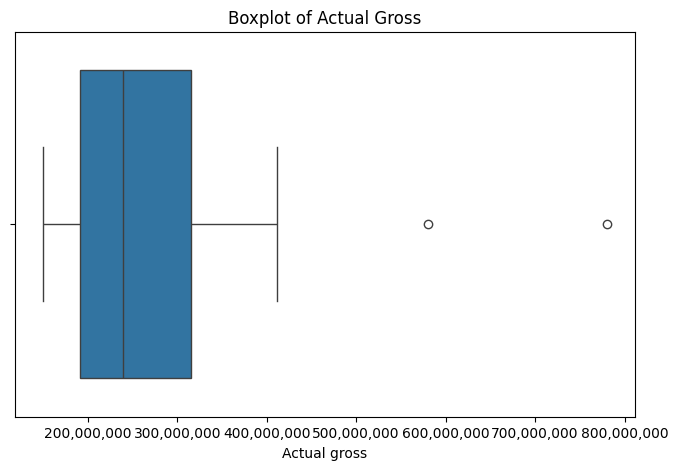

In [82]:
import matplotlib.ticker as ticker

plt.figure(figsize=(8, 5))
ax = sns.boxplot(x=df["Actual gross"])  

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}')) 
plt.title("Boxplot of Actual Gross")
plt.show()


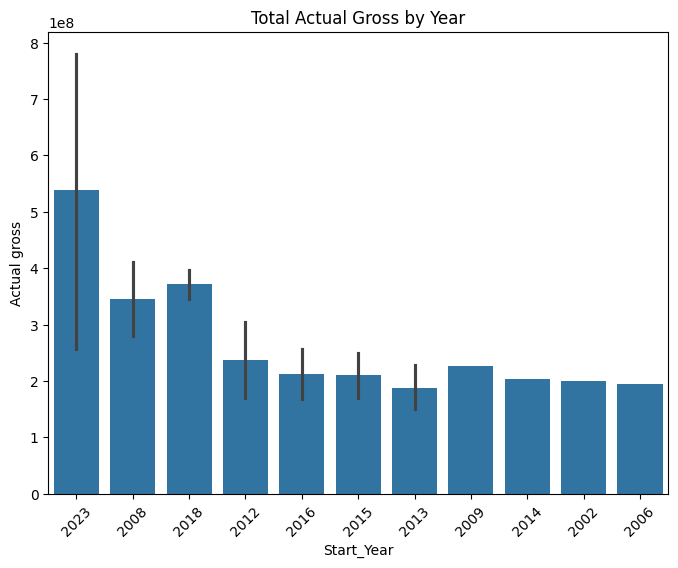

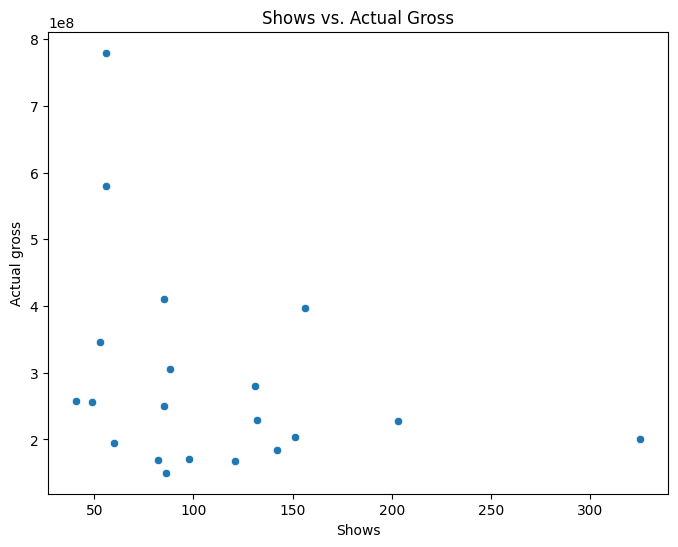

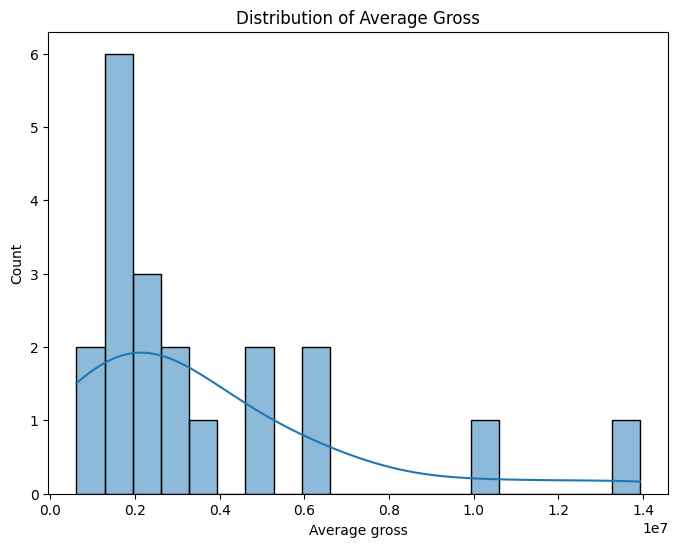

In [84]:

start_year_col = 'Start_Year' 

plt.figure(figsize=(8, 6))
sns.barplot(x=start_year_col, y='Actual gross', data=df)
plt.title('Total Actual Gross by Year')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Shows', y='Actual gross', data=df)
plt.title('Shows vs. Actual Gross')
plt.show()


plt.figure(figsize=(8, 6))
sns.histplot(df['Average gross'], bins=20, kde=True)
plt.title('Distribution of Average Gross')
plt.show()